# Mnist dataset class

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import pandas
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
class MnistDataset(Dataset):
    def __init__(self,csv_file):
        self.data_df = pandas.read_csv(csv_file,header=None)
        pass
    def __len__(self):
        return len(self.data_df)
    def __getitem__(self,index):
        #이미지 목표(레이블)
        label =self.data_df.iloc[index,0]
        #one hot encoding
        target=torch.zeros((10))
        target[label]=1.0
        
        #0~255의 이미지를 0~1로 정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0
        # 레이블,이미지,데이터 텐서 ,목표 텐서 반환
        return label,image_values ,target
    def plot_image(self,index):
        img=self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label="+str(self.data_df.iloc[index,0]))
        plt.imshow(img,interpolation='none',cmap='Blues')
        pass
    pass

(4,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

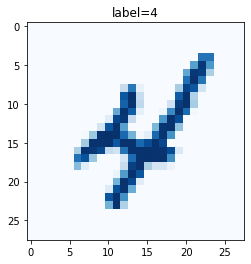

In [4]:
# load data
mnist_dataset= MnistDataset('C:/Users/Songwooseok/mnist_train.csv')
mnist_dataset.plot_image(9)
mnist_dataset.__getitem__(9)

# Mnist Discriminator

In [5]:
class Discriminator (nn.Module): # nn.Module 을 상속받아 신경망 클래스를 만들어보자 
    def __init__(self):
        #파이토치 부모 클래스 초기화
        super().__init__()
        
        #신경망 레이어 정의
        self.model = nn.Sequential(
        nn.Linear(784,200),
        nn.LeakyReLU(0.02),
        #nn.Sigmoid(),
        nn.LayerNorm(200),
        nn.Linear(200,1),
        nn.Sigmoid()
        )
        
        #손실함수 설정
        #self.loss_function = nn.MSELoss()
        self.loss_function = nn.BCELoss()
        
        #옵티마이저 설정
        self.optimiser = torch.optim.Adam(self.parameters(),lr=0.0001)
        
        #진행 측정을 위한 변수 초기화
        self.counter =0 ;
        self.progress =[]
        
        pass
    
    def forward(self,inputs):
        #모델실행
        return self.model(inputs)
    def train(self, inputs,targets):
        #신경망 출력 계산
        outputs = self.forward(inputs)
        
        #손실계산
        loss = self.loss_function(outputs,targets)
        
        #카운터를 증가시키고 10회마다 오차 저장
        self.counter+=1 ;
        if (self.counter %10==0):
            self.progress.append(loss.item())
            pass
        if (self.counter %10000==0):
            print("counter = ",self.counter)
            pass
        
        #기울기를 초기화하고 역전파 후 가중치 갱신
        self.optimiser.zero_grad() #기울기 초기화
        loss.backward() #역전파 실행
        self.optimiser.step() #가중치 갱신
        
        pass
        
    def plot_progress(self):
        df= pandas.DataFrame(self.progress , columns=['loss'])
        df.plot(ylim=(0),figsize=(16,8),alpha=0.1,marker='.',grid=True,
                yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass
    pass

        
        

## 판별기 테스트 하기

In [6]:
'''훈련 성능 올리기 위해서 판별기, 생성기에 넣는 것 구별함. 
def generate_random(size):
    random_data = torch.rand(size)
    return random_data
'''
#판별기에 투입할 떄마다 쓰는 것  size 784
def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data

#생성기에 투입할 떄마다 쓰는 것 
def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

In [7]:
%%time
D= Discriminator()
for label, image_data_tensor ,target_tensor in mnist_dataset:
    #실제 데이터 
    D.train(image_data_tensor,torch.FloatTensor([1.0]))
    # 생성된 데이터 
    D.train(generate_random_image(784),torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
Wall time: 5min 33s


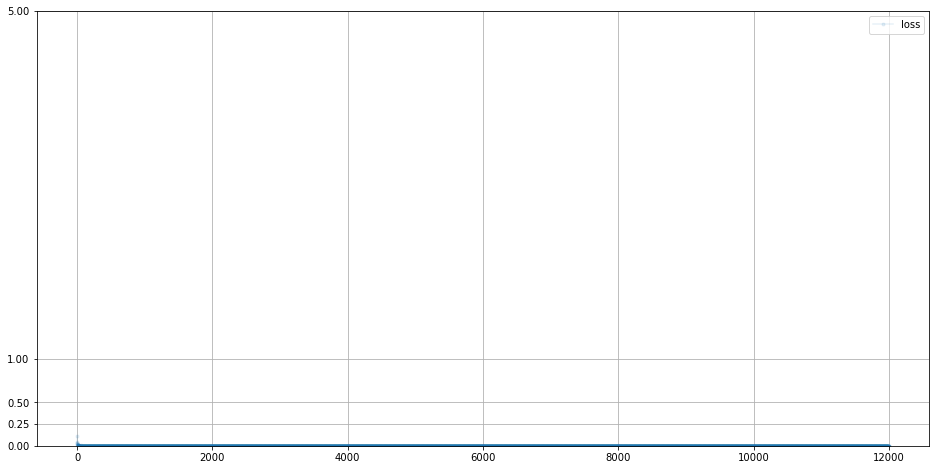

In [8]:
D.plot_progress()

In [9]:
# 훈련된 판별기에 임의의 이미지를 넣어서 테스트. 

for i in range(4):
    image_data_tensor = mnist_dataset[random.randint(0,60000)][1]
    print(D.forward(image_data_tensor).item())
    pass
for i in range(4):
    print(D.forward(generate_random_image(784)).item())
    pass

1.0
1.0
1.0
1.0
9.228630012958483e-12
1.0120966564830525e-11
8.611222845900102e-12
9.344879904615855e-12


# Mnist 생성기
- 생성기 입력으로 상수 0.5가 들어가면 안되고, 매 훈련 사이클 마다 임의적인 입력을 사용하면 된다. random seed.

In [10]:
class Generator (nn.Module): # nn.Module 을 상속받아 신경망 클래스를 만들어보자 
    def __init__(self):
        #파이토치 부모 클래스 초기화
        super().__init__()
        
        #신경망 레이어 정의 # 판별기와는 반대
        self.model = nn.Sequential(
        nn.Linear(100,200),
        #nn.Sigmoid(),
        nn.LeakyReLU(0.02),
        nn.LayerNorm(200),
        nn.Linear(200,784),
        nn.Sigmoid()
        )
        
        #손실함수 설정
        # 안해도 된다. 손실함수는 오직 판별기의 결과에만 적용이 된다. 생겅기는 판별기로 부터 흘러온 기울기 오차를 통해 업데이트됨.
        
        
        #옵티마이저 설정
        self.optimiser = torch.optim.Adam(self.parameters(),lr=0.0001)
        
        #진행 측정을 위한 변수 초기화
        self.counter =0 ;
        self.progress =[]
        
        pass
    
    def forward(self,inputs):
        #모델실행
        return self.model(inputs)
    
    '''
    판별기를 훈련할 떄는 어떤 결과가 정답이 되어야 하는지 명확하게 알지만 생서익의 경우는 아님
    판별기의 결과로 계산된 손실의 역전파 값이 있다.
    결과적으로, 생성기를 훈련 시킬 때는 판별기가 필요합니다 . 판별기를 생성기의 train 함수에 넘겨주는 방식이다. 
    '''
    
    def train(self,D, inputs,targets):
        #신경망 출력 계산
        g_output = self.forward(inputs)
        
        # 판별기로 전달
        d_output =D.forward(g_output)
        
        #손실계산
        loss = D.loss_function(d_output,targets)
        
        #카운터를 증가시키고 10회마다 오차 저장
        self.counter+=1 ;
        if (self.counter %10==0):
            self.progress.append(loss.item())
            pass
    
        #기울기를 초기화하고 역전파 후 가중치 갱신
        self.optimiser.zero_grad() #기울기 초기화
        loss.backward() #역전파 실행
        self.optimiser.step() #가중치 갱신
        pass
    def plot_progress(self):
        df= pandas.DataFrame(self.progress , columns=['loss'])
        df.plot(ylim=(0),figsize=(16,8),alpha=0.1,marker='.',grid=True,
                yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass
    pass

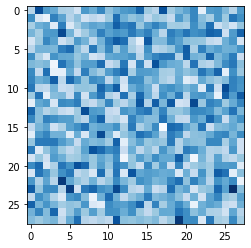

In [11]:
# 훈련 전 생성기 결과 확인하기
G= Generator()
output = G.forward(generate_random_seed(100))
img = output.detach().numpy().reshape(28,28)
plt.imshow(img, interpolation='none',cmap='Blues')

# GAN 훈련하기

In [12]:
%%time

#판별기 ,생성기 생성
D= Discriminator()
G= Generator()

#3에폭의 훈련하기 
epochs=3
for epoch in range(epochs):
    print("epoch=",epoch+1)
    # 판별기,생성기 훈련
    for label, image_data_tensor, target_tensor in mnist_dataset:

        # 1단계 : 참에 대한 판결기 훈련 (실제 데이터에 대해서 훈련)
        D.train(image_data_tensor,torch.FloatTensor([1.0]))

        '''
        #2단계 :거짓에 대해 판별기 훈련 - 생성기에서 비롯된 패턴을 통해 학습
        - G의 기울기가 계산되지 않도록 detach() 함수를 이용 -생성기의 출력에 적용되어 계산 그래프에서 생성기를 떼어내는 역할을 함.
        현재 판별기 훈련중이므로 생성기의 기울기를 계산할 이유가 없음 
        '''
        D.train(G.forward(generate_random_seed(100)).detach(),torch.FloatTensor([0.0]))

        # 3단계 : 생성기 훈련
        G.train(D,generate_random_seed(100),torch.FloatTensor([1.0]))

        pass
    pass

epoch= 1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch= 2
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
epoch= 3
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
Wall time: 25min 58s


'\nMSELoss와는 다르게 , BCELoss의 최댓값은 1.0으로 제한되어있지앟음. \n이상적인 이진교처 엔트로피의 손실은 0.69이다 .\n'

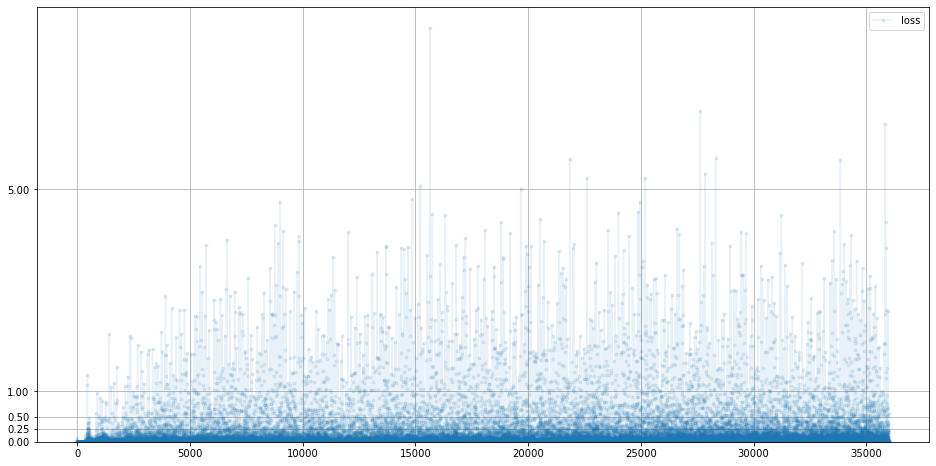

In [13]:
D.plot_progress()
'''
MSE 경우
판별기가 실제 데이터와 조작된 데이터를 잘 판별하지 못하는 결과를 내놓는 다면 , 
그결과는 0.5라는 결과를 내놓을 것이다.
현재 평균 제곱오차를 이용했기 때문에 0.5를 제곱한 0.25가 손실로 나오는 것이다. 
손실값이 0에 가깝게 나오는 부분은 , 
생성기의 성능이 떨어져 판별기를 속일 수 없는 상태다 ㅠㅠ.
'''
'''
MSELoss와는 다르게 , BCELoss의 최댓값은 1.0으로 제한되어있지앟음. 
이상적인 이진교처 엔트로피의 손실은 0.69이다 .
'''

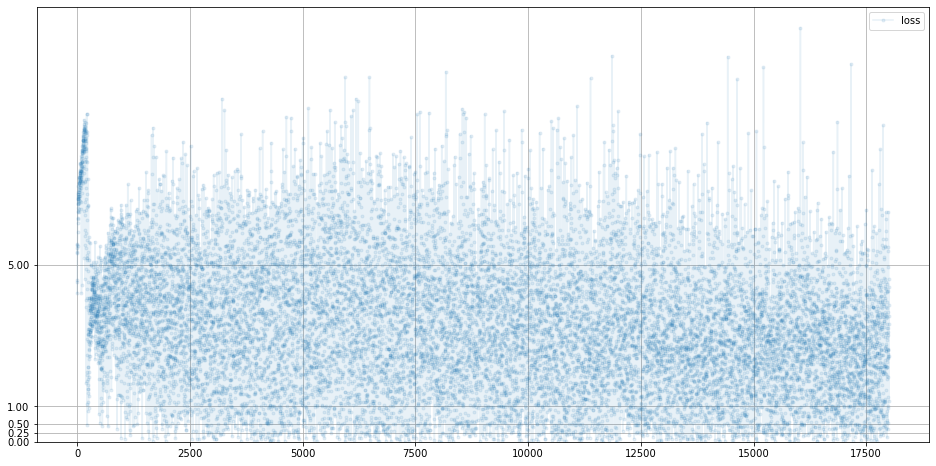

In [14]:
G.plot_progress()
#MSELoss와는 다르게 , BCELoss의 최댓값은 1.0으로 제한되어있지앟음. 

# Run generator
생성기가 만들어낸 이미지들을 살펴보자. 
서로 다른 임의 시드에서 각기 다른 이미지가 생성되리라 예상되므로,
여러장의 이미지를 골라서 그려보자.

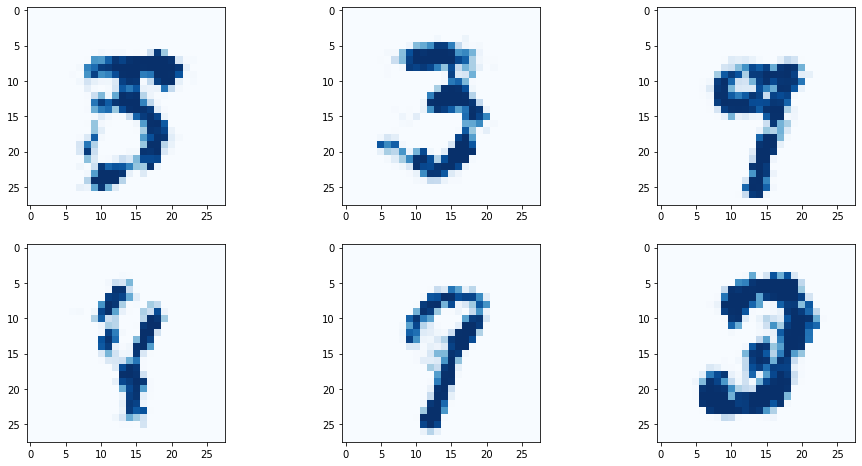

In [15]:
#2행 3열로 생성된 이미지 출력
f,axarr = plt.subplots(2,3,figsize=(16,8))
for i in range(2):
    for j in range(3):
        output= G.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img,interpolation='none',cmap='Blues')
        pass
    pass

### Mode collapse
- 생성기가 10개의 숫자를 다양하게 생성하는 것이 바람직하다. 하지만
- 위의 이미지들을 보면 모두 똑같이 생긴 것 처럼 보인다. -> 모드 붕괴 현상 !
- 모드붕괴의 원인은 알 수 없지만 그럴듯한 이론은
- 생성기가 판별기보다 더 앞서간 후에 항상 실제에 가깝게 결과가 나오는 지점을 발견하여 그 이미지를 계속 만들어 내게 된다. 
->판별기가 생성기에게 더 나은 피드백을 주게끔 훈련의 질을 높이자 !!!! 

# Improving GAN's training performance

- 이진 교차 에트로피 BCELOSS
- sigmoid 대신 leakyrelu 
- 정규화 Layer norm
- sgd 대신 adam
- seed에 충분히 많은 숫자 
- 판별기와 생성기에 주는 임의의 숫자가 달라야함 generate_random_image, generate_random_seed 

# experiment with seed

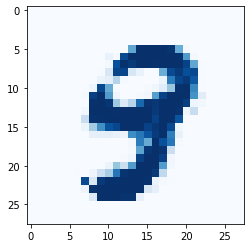

In [46]:
#seed1 -명확한 형상을 띌때까지 반복하자 
seed1 =generate_random_seed(100)
out1 = G.forward(seed1)
img1= out1.detach().numpy().reshape(28,28)
plt.imshow(img1,interpolation='none',cmap='Blues')

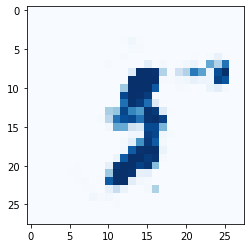

In [49]:
#seed2 --명확한 형상을 띌때까지 반복하자 
seed2 =generate_random_seed(100)
out2 = G.forward(seed2)
img2= out2.detach().numpy().reshape(28,28)
plt.imshow(img2,interpolation='none',cmap='Blues')

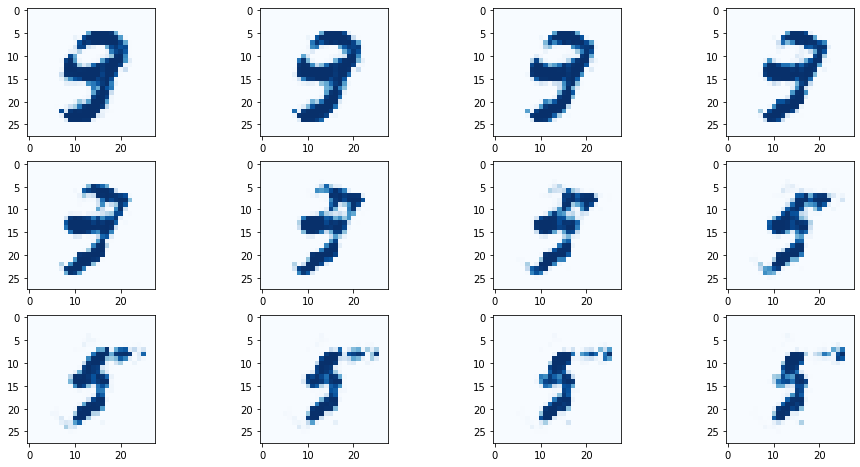

In [50]:
#seed1과 seed2 사이의 일정한 간격의 12개 시드를 구하는 코드
count=0

f,axarr = plt.subplots(3,4,figsize=(16,8))
for i in range(3):
    for j in range(4):
        seed = seed1+ (seed2-seed1)/11*count
        output =G.forward(seed)
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img,interpolation='none',cmap='Blues')
        count +=1
        pass
    pass

# seed1에서 seed2로 갈수록 ->>>> 5는 3을 향해 진화하고 있다 

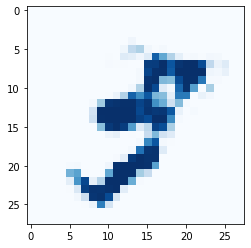

In [51]:
#시드끼리 더하면???
seed3 =seed1+seed2
out3 = G.forward(seed3)
img3= out3.detach().numpy().reshape(28,28)
plt.imshow(img3,interpolation='none',cmap='Blues')

#->>>각 이미지의 합친 이미지를 생성해낸다!!!!!

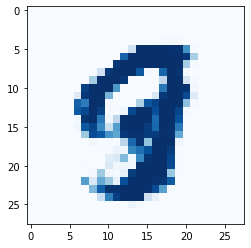

In [52]:
#빼면???
seed4 =seed1-seed2
out4 = G.forward(seed4)
img4= out4.detach().numpy().reshape(28,28)
plt.imshow(img4,interpolation='none',cmap='Blues')

# ->>겹치는 부분을 뺀것같지는 않네....